In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import os
import csv
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import dataframe_image as dfi


In [2]:
## Import the IMDB_Movies2.csv file as a DataFrame
movies_df = pd.read_csv("resources/IMDB_Movies2.csv")


## csv file  manipulation 
* dropping rows with empty cells
* Renaming the columns 
* Converting the Date into a datetime format for the data manipolation
* adding a new column "Year" 
* sorting the data by year in a discending order


In [3]:
#dropping row with empty value
movies_df.dropna(how ="any")

,Movie ID,original_title,date_published,genre,duration,country,director,actors_1,avg_vote,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,367882,Indiana Jones and the Kingdom of the Crystal S...,23/05/2008,Action,122,USA,Steven Spielberg,Harrison Ford,6.1,185000000,317101119,790653942,2173
1,120912,Men in Black II,13/09/2002,Action,88,USA,Barry Sonnenfeld,Tommy Lee Jones,6.2,140000000,193735288,445135288,650
2,157472,Clockstoppers,26/07/2002,Action,94,USA,Jonathan Frakes,Jesse Bradford,5.2,26000000,36989956,38793283,95
3,227538,Spy Kids,24/08/2001,Action,88,USA,Robert Rodriguez,Antonio Banderas,5.5,35000000,112719001,147934180,221
4,258038,Pootie Tang,29/06/2001,Action,81,USA,Louis C.K.,Lance Crouther,5.3,7000000,3313583,3313583,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1130884,Shutter Island,05/03/2010,Mystery,138,USA,Martin Scorsese,Leonardo DiCaprio,8.2,80000000,128012934,294804195,1286
1677,1385826,The Adjustment Bureau,17/06/2011,Romance,106,USA,George Nolfi,Matt Damon,7.0,50200000,62495645,127869379,477
1678,1219289,Limitless,15/04/2011,Sci-Fi,105,USA,Neil Burger,Bradley Cooper,7.4,27000000,79249455,161849455,488
1679,421239,Red Eye,21/10/2005,Thriller,85,USA,Wes Craven,Rachel McAdams,6.4,26000000,57891803,96258201,706


In [37]:
#rename columns for better understanding
rename_df = movies_df.rename( columns={"original_title" : "Title", "actors_1":"Actors",
                                       "date_published":"Date","budget":"Budget","director":"Director", 
                                       "usa_gross_income":"USA Gross Income",
                                       "worlwide_gross_income":"Worldwide Gross Income",
                                       "genre":"Genre","duration":"RunTime","avg_vote":"Average_Vote", 
                                       "reviews_from_users":"Fan Reviews" })


In [5]:
#convert date to datetime format
rename_df["Date"] = pd.to_datetime(rename_df.Date)

In [7]:
#adding a new column "year"
rename_df["Year"] = rename_df.Date.dt.year
rename_df.head()

,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year
0,367882,Indiana Jones and the Kingdom of the Crystal S...,2008-05-23,Action,122,USA,Steven Spielberg,Harrison Ford,6.1,185000000,317101119,790653942,2173,2008
1,120912,Men in Black II,2002-09-13,Action,88,USA,Barry Sonnenfeld,Tommy Lee Jones,6.2,140000000,193735288,445135288,650,2002
2,157472,Clockstoppers,2002-07-26,Action,94,USA,Jonathan Frakes,Jesse Bradford,5.2,26000000,36989956,38793283,95,2002
3,227538,Spy Kids,2001-08-24,Action,88,USA,Robert Rodriguez,Antonio Banderas,5.5,35000000,112719001,147934180,221,2001
4,258038,Pootie Tang,2001-06-29,Action,81,USA,Louis C.K.,Lance Crouther,5.3,7000000,3313583,3313583,133,2001


In [8]:
#sorting the dataframe by descending order
rename_year_df = rename_df.sort_values(["Year"], ascending=False)

In [9]:
#exporting the csv file
rename_year_df.to_csv("resources/rename_year_df.csv")

# Question(3) Does the runtime of the movie affect the public rating?

#### Findings
* The figure shows that from 2000 to 2004 the runtime for movie was between 80 and 110 minutes with the average vote between 4.8 and 7.6. few movies had a runtime outside that range and their average vote is slightly over 6
* As it can be observed in the other three figures, the data concentration change for both runtime and average vote. From 2005 to 2009, for instance, the data cloud is more concentrated between 80 and 140 minutes for the runtime with the average vote between 5 and 7.4. It is also possible to observe that for this range of year more movies had a long runtime with relatively high average vote
* The Dynamic is the same for the yearly range 2010-2014 and 2015-2020. In which the visualizations show different concentration of data.
 


In [10]:
#creating four dataframes considering different yearly intervals  
Bin_df = rename_year_df.loc[rename_year_df["Year"] < 2005]
Bin1_df = rename_year_df.loc[(rename_year_df["Year"] >= 2005) & (rename_year_df["Year"]< 2010)]
Bin2_df = rename_year_df.loc[(rename_year_df["Year"] >= 2010) & (rename_year_df["Year"]< 2015)]
Bin3_df = rename_year_df.loc[rename_year_df["Year"] >= 2015]

<Figure size 432x288 with 0 Axes>

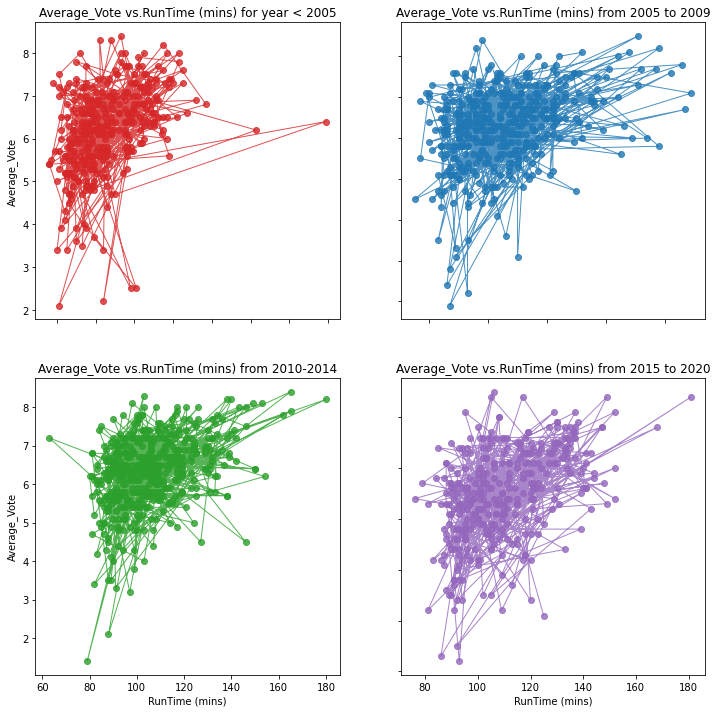

In [11]:
#subploting the above data 
#showing a visualization for Bivariate data( average vote and runtime)
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12,12)


axs[0, 0].plot(Bin_df["RunTime"], Bin_df["Average_Vote"],"tab:red",alpha=0.8,linewidth=1, marker="o")
axs[0, 0].set_title("Average_Vote vs.RunTime (mins) for year < 2005")
axs[0, 1].plot(Bin1_df["RunTime"], Bin1_df["Average_Vote"],"tab:blue",alpha=0.8,linewidth=1, marker="o")
axs[0, 1].set_title("Average_Vote vs.RunTime (mins) from 2005 to 2009")
axs[1, 0].plot(Bin2_df["RunTime"], Bin2_df["Average_Vote"],"tab:green",alpha=0.8,linewidth=1, marker="o")
axs[1, 0].set_title("Average_Vote vs.RunTime (mins) from 2010-2014")
axs[1, 1].plot(Bin3_df["RunTime"],Bin3_df["Average_Vote"],"tab:purple",alpha=0.8,linewidth=1, marker="o")
axs[1, 1].set_title("Average_Vote vs.RunTime (mins) from 2015 to 2020")

for ax in axs.flat:
    ax.set(xlabel="RunTime (mins)", ylabel="Average_Vote")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig("Images/avg.vote and runtime yearly intervals.png")    

### Statistical analysis
#### with the data below, an analysis was conducted to determine the relationship between the average vote and the average runtime for genres in four ranges of year. Therefore, the different linear correlation coefficients can be interpreted accordingly:
* In the range 2000-2004, the regression line is decreasing and the r-value is -0,133 which highlights the negative correlation between the average vote and the runtime. It can be observed that the data are far from the regression line.
* On the contrary, the three other ranges of year have a positive regression lines showing a positive dependence between the two values of the analysis as shown by the respective R-values. it is also shown that the intervals 2010-2014 and 2015-2020 have a r-value almost equal to 1 which shows an almost perfect linear correlation between the average vote and the average runtime.
* The range 2015-2020 has a r-value equal to 0.994 which shows the highest dependence of the average vote on the average runtime

In [38]:

# Creating a dataframe for the average RunTime per genre in 4 times intervals 
#filled the NaN cell with zero
rt_2000_2004 = rename_year_df.loc[rename_year_df["Year"] < 2005].groupby(["Genre"])["RunTime"].mean()
rt_2005_2009 = rename_year_df.loc[(rename_year_df["Year"] >= 2005) & (rename_year_df["Year"]< 2010)].groupby(["Genre"])["RunTime"].mean()
rt_2010_2014 = rename_year_df.loc[(rename_year_df["Year"] >= 2010) & (rename_year_df["Year"]< 2015)].groupby(["Genre"])["RunTime"].mean()
rt_2015_2020 = rename_year_df.loc[rename_year_df["Year"] >= 2015].groupby(["Genre"])["RunTime"].mean()


AVG_RT_df = pd.DataFrame({"2000-2004": rt_2000_2004,
      "2005-2009": rt_2005_2009,
      "2010-2014": rt_2010_2014,
      "2015-2020": rt_2015_2020})
                           
                           
AV_RT_df = AVG_RT_df.fillna(0)

AV_RT_df.to_csv("resources/avg. Runtime yearly intervals.csv")
dfi.export(AV_RT_df,"images/avg. Runtime yearly intervals.png")

AV_RT_df 




,2000-2004,2005-2009,2010-2014,2015-2020
Action,114.414286,111.084337,110.392000,116.702128
Adventure,102.200000,102.250000,106.714286,107.125000
Animation,87.875000,91.947368,94.472222,96.750000
Biography,133.818182,122.315789,118.913043,119.684211
Comedy,99.364286,103.259036,101.093023,103.772727
Crime,111.800000,108.722222,111.458333,121.600000
Drama,110.500000,110.692308,111.395062,111.000000
Family,0.000000,107.000000,0.000000,129.000000
Fantasy,0.000000,94.500000,91.000000,0.000000
Horror,102.600000,96.523810,94.464286,93.384615


In [39]:
#Creating a dataframe for the mean of the Average vote per genre in 4 time intervals
#filled the NaN cell with zero

AV_2000_2004 = rename_year_df.loc[rename_year_df["Average_Vote"] < 2005].groupby(["Genre"])["Average_Vote"].mean()
AV_2005_2009 = rename_year_df.loc[(rename_year_df["Year"] >= 2009) & (rename_year_df["Year"]< 2010)].groupby(["Genre"])["Average_Vote"].mean()
AV_2010_2014 = rename_year_df.loc[(rename_year_df["Year"] >= 2010) & (rename_year_df["Year"]< 2015)].groupby(["Genre"])["Average_Vote"].mean()
AV_2015_2020 = rename_year_df.loc[rename_year_df["Year"] >= 2015].groupby(["Genre"])["Average_Vote"].mean()


Mean_AV_df = pd.DataFrame({"2000-2004": AV_2000_2004,
      "2005-2009": AV_2005_2009,
      "2010-2014": AV_2010_2014,
      "2015-2020": AV_2015_2020})                           
                          
AVG_vote_df = Mean_AV_df.fillna(0)

AVG_vote_df.to_csv("resources/avg.vote yearly intervals.csv")
dfi.export(AVG_vote_df,"images/avg.vote yearly intervals.png")
AVG_vote_df


,2000-2004,2005-2009,2010-2014,2015-2020
Action,6.293548,6.033333,6.268800,6.529787
Adventure,6.001562,6.300000,6.066667,6.212500
Animation,6.688889,6.670000,6.722222,6.828571
Biography,7.038462,6.985714,6.986957,7.013158
Comedy,6.060601,6.110345,6.113953,6.320455
Crime,6.687619,6.800000,6.708333,6.806667
Drama,6.619691,6.707692,6.725926,6.530612
Family,6.500000,0.000000,0.000000,7.100000
Fantasy,6.133333,0.000000,6.500000,0.000000
Horror,5.614118,5.775000,5.628571,5.330769


In [40]:
def plot_linear_regression(x_values,y_values,xlbl,ylbl,lblpos):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(slope) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,lblpos ,fontsize=14, color="red")
    plt.xlabel(xlbl,fontsize =12)
    plt.ylabel(ylbl,fontsize =12)
    print(f"The r-squared is: {round(rvalue,3)}")
    
    plt.show()

The r-squared is: -0.133


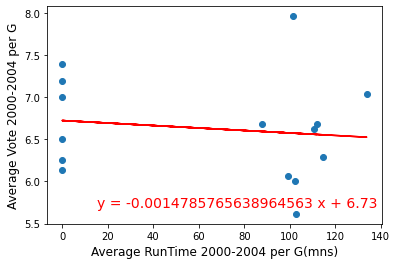

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = AV_RT_df["2000-2004"]
y_values = AVG_vote_df["2000-2004"]
xlbl = "Average RunTime 2000-2004 per G(mns)"
ylbl = "Average Vote 2000-2004 per G"
eqpos = (15,5.7)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)
plt.savefig("Images/avg.vote and avg.runtime 2000-2004.png") 

The r-squared is: 0.702


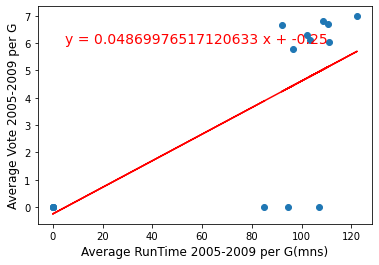

In [42]:
x_values = AV_RT_df["2005-2009"]
y_values = AVG_vote_df["2005-2009"]
xlbl = "Average RunTime 2005-2009 per G(mns)"
ylbl = "Average Vote 2005-2009 per G"
eqpos = (5,6)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

The r-squared is: 0.943


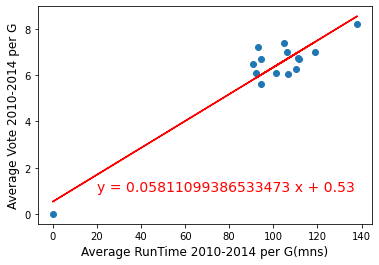

In [43]:
x_values =AV_RT_df["2010-2014"]
y_values =AVG_vote_df["2010-2014"]
xlbl = "Average RunTime 2010-2014 per G(mns)"
ylbl = "Average Vote 2010-2014 per G"
eqpos = (20,1)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

The r-squared is: 0.994


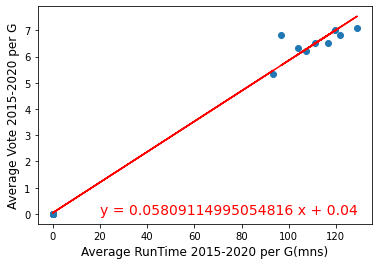

In [44]:
x_values = AV_RT_df["2015-2020"]
y_values = AVG_vote_df["2015-2020"]
xlbl = "Average RunTime 2015-2020 per G(mns)"
ylbl = "Average Vote 2015-2020 per G"
eqpos = (20,0)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

## question(4) Does the genre of a movie determine or affects its public rating and runtime? 
### Determine the worldwide gross incomes per genre in the twenty years time frame and analyze them in relation to the average vote, average runtime and fan reviews  

#### findings
1. linear regression line between the Average RunTime and average vote of each genere from 2000 t0 2020 has a positive bias. However, with an r-value equal to 0.354, the interdependence between the two factors is partially linear.
2. From the worldwide gross income bar chart, Action movie has the highest worldwide gross income with more than 91 billion dollars followed by animation with 49 billion dollars and comedy with 41 billion dollars, while as music has the lowest worldwide gross income with only a worldwide gross income of almost 8 million dollars
3. Regarding the average runtime per genre in the considerated time frame,Biography has the highest average runtime of 122 and thriller with runtime of 88. The Average runtime for the other genres, however, appears more or less relatively uniform with no significant difference. In relation to the worldwide gross income, the regression line is almost flat showing an insignificant relation between the 2 factors 
4. concerning the average vote, the only difference with the previous analysis is that the regression line is negatively inclined, which highlights an inversely proportional relationship between the worldwide gross income and the average vote. Furthermore, the r-value is negative confirming the finding.
5. Regarding fan reviews, the data shows that in addition to the action genre which has the highest number of reviews in the 200-2020 range, the comedy genre ranks second followed by the drama genre in third position. this positioning differs from that obtained with the worldwide gross income by genres. In fact, in this ranking, the animation genre has a lower total number of fan reviews than comedy and drama. The data also show an almost perfect but non-linear relationship between the worldwide gross income by genre and the sum of fan reviews by movie genre. The linear correlation coefficient is equal to 0.9, a sign of a high linear interdependence


In [45]:
#groupying the dataframe by Genere
grouped_movies_df=rename_year_df.groupby(["Genre"])

In [46]:
#determine the Worldwide Gross Income per genre from 2000 to 2020
sum_wgi = grouped_movies_df["Worldwide Gross Income"].sum()
sum_wgi.map("${:,.0f}".format)

Genre
Action       $91,270,779,105
Adventure     $8,321,348,021
Animation    $49,457,243,863
Biography     $6,945,240,793
Comedy       $41,138,561,095
Crime         $6,214,568,943
Drama        $17,035,824,327
Family        $1,278,931,894
Fantasy         $257,805,064
Horror        $6,440,822,447
Music             $7,975,812
Mystery         $425,034,117
Romance         $127,869,379
Sci-Fi          $161,849,455
Thriller         $96,361,020
Name: Worldwide Gross Income, dtype: object

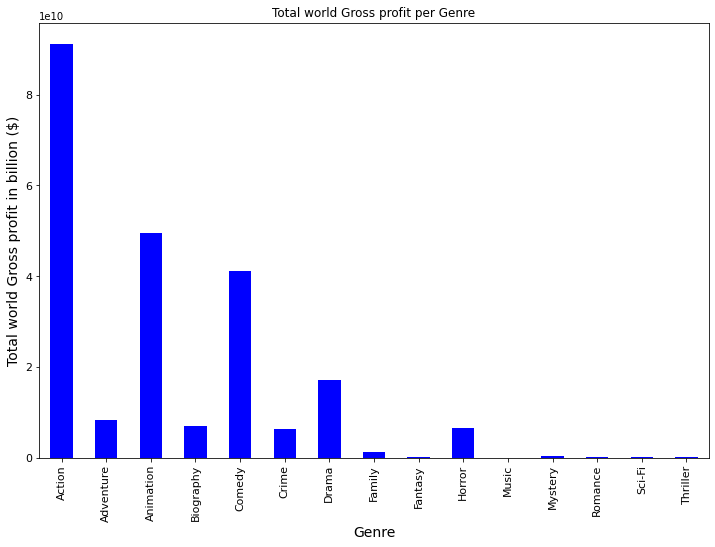

In [47]:
#plot the above result for further analysis
sum_wgi.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("Total world Gross profit in billion ($)",  fontsize = 14)
plt.title("Total world Gross profit per Genre")
plt.savefig("Images/Total world Gross profit per Genre from 2000 to 2020.png")
plt.show()

In [48]:
#The overall Total Gross Income in the considered time frame 
Total_Gross_Income = rename_year_df ["Worldwide Gross Income"].sum()
Total_Gross_Income

229180215335

In [49]:
# percentage of each genere worldwide gross Income in the overall Total gross Income
per_wgp_per_G = (sum_wgi/Total_Gross_Income)*100
per_wgp_per_G.map("{:,.2f}%".format)

Genre
Action       39.82%
Adventure     3.63%
Animation    21.58%
Biography     3.03%
Comedy       17.95%
Crime         2.71%
Drama         7.43%
Family        0.56%
Fantasy       0.11%
Horror        2.81%
Music         0.00%
Mystery       0.19%
Romance       0.06%
Sci-Fi        0.07%
Thriller      0.04%
Name: Worldwide Gross Income, dtype: object

In [50]:
# average runtime per genre
RunTime_D = grouped_movies_df["RunTime"].mean()
RunTime_D.map("{:,.0f}".format)

Genre
Action       113
Adventure    104
Animation     93
Biography    122
Comedy       102
Crime        112
Drama        111
Family       118
Fantasy       93
Horror        96
Music         93
Mystery      114
Romance      106
Sci-Fi       105
Thriller      88
Name: RunTime, dtype: object

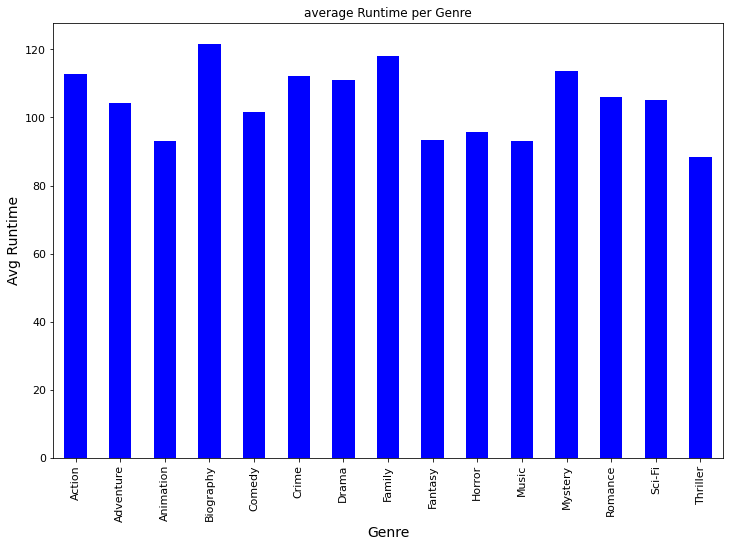

In [51]:
#plot the above result
RunTime_D.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("Avg Runtime",  fontsize = 14)
plt.title("average Runtime per Genre")
plt.savefig("Images/average Runtime per Genre from 2000 to 2020.png")
plt.show()

In [52]:
# average vote per genre in the time frame
avg_D = grouped_movies_df["Average_Vote"].mean()
avg_D.map("{:,.1f}".format)


Genre
Action       6.3
Adventure    6.0
Animation    6.7
Biography    7.0
Comedy       6.1
Crime        6.7
Drama        6.6
Family       6.5
Fantasy      6.1
Horror       5.6
Music        7.2
Mystery      8.0
Romance      7.0
Sci-Fi       7.4
Thriller     6.2
Name: Average_Vote, dtype: object

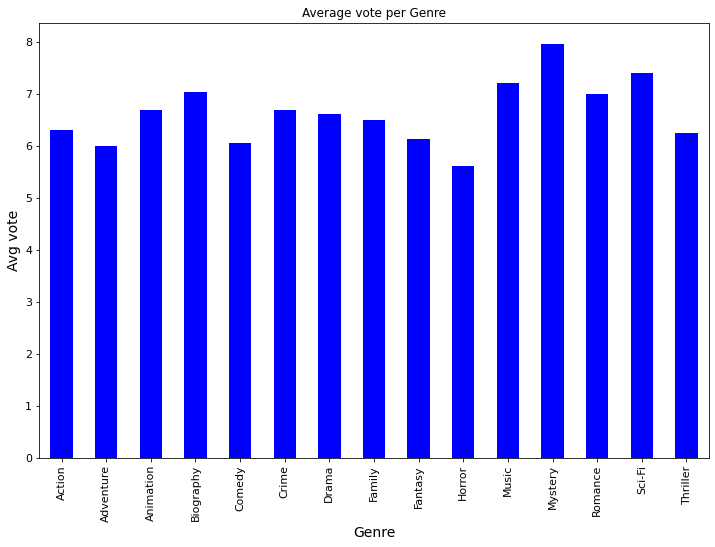

In [53]:
#plot the above result
avg_D.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("Avg vote",  fontsize = 14)
plt.title("Average vote per Genre")
plt.savefig("Images/Average vote per Genre from 2000 to 2020.png")
plt.show()

In [54]:
# determining the total fan reviews per genre in the 20 years time frame
fan_rv = grouped_movies_df["Fan Reviews"].sum()
fan_rv#.map("{:,.2f}".format)

Genre
Action       259906
Adventure     24868
Animation     44449
Biography     29538
Comedy       135056
Crime         42366
Drama        111329
Family         1345
Fantasy        1832
Horror        39506
Music            69
Mystery        4341
Romance         477
Sci-Fi          488
Thriller        794
Name: Fan Reviews, dtype: int64

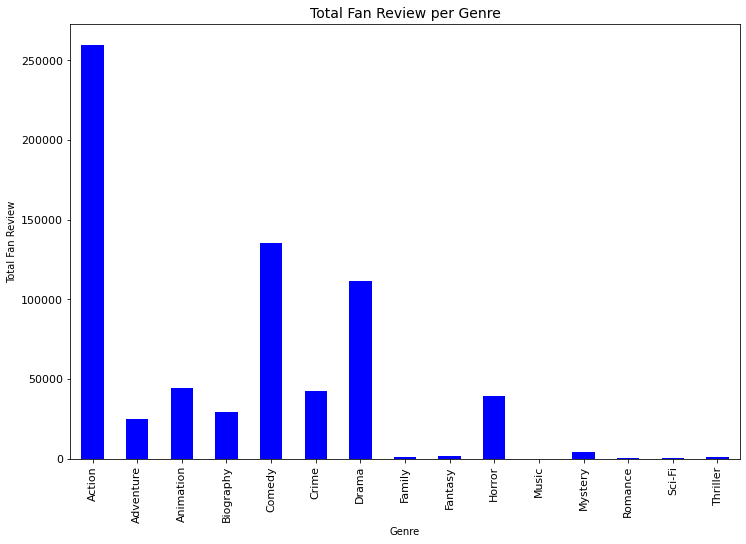

In [55]:
#plot the above result
fan_rv.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 10)
plt.ylabel("Total Fan Review",  fontsize = 10)
plt.title("Total Fan Review per Genre", fontsize = 14)
plt.savefig("Images/Total Fan Review per Genre from 2000 to 2020.png")
plt.show()

In [56]:
#Overall amount of fan reviews between 2000 and 2020
Total_W_review = rename_year_df ["Fan Reviews"].sum()
Total_W_review

696364

In [57]:
# determining the percentage of fan reviews per genre on the overall amount of fan reviews
per_WR_per_G = (fan_rv/Total_W_review)*100
per_WR_per_G.map("{:,.3f}%".format)


Genre
Action       37.323%
Adventure     3.571%
Animation     6.383%
Biography     4.242%
Comedy       19.394%
Crime         6.084%
Drama        15.987%
Family        0.193%
Fantasy       0.263%
Horror        5.673%
Music         0.010%
Mystery       0.623%
Romance       0.068%
Sci-Fi        0.070%
Thriller      0.114%
Name: Fan Reviews, dtype: object

In [58]:
#creating a dataframe of above result for the statistical analysis
prvf_df = pd.DataFrame({"Total wgpg": sum_wgi,
      "Avg RunTime":RunTime_D,
      "Avg Vote": avg_D,
      "Total Fan reviews": fan_rv,
      "%Overall Gross Income": per_wgp_per_G,
      "%Overall Fan review":per_WR_per_G})
prvf_df.to_csv("resources/avg. Runtime yearly intervals.csv")
dfi.export(prvf_df,"images/summary prvf.png")

prvf_df

,Total wgpg,Avg RunTime,Avg Vote,Total Fan reviews,%Overall Gross Income,%Overall Fan review
Genre,,,,,,
Action,91270779105,112.897849,6.293548,259906,39.824895,37.323296
Adventure,8321348021,104.312500,6.001562,24868,3.630919,3.571121
Animation,49457243863,92.960317,6.688889,44449,21.580067,6.383012
Biography,6945240793,121.747253,7.038462,29538,3.030471,4.241747
Comedy,41138561095,101.717314,6.060601,135056,17.950311,19.394455
Crime,6214568943,112.066667,6.687619,42366,2.711652,6.083887
Drama,17035824327,110.922780,6.619691,111329,7.433375,15.987185
Family,1278931894,118.000000,6.500000,1345,0.558046,0.193146
Fantasy,257805064,93.333333,6.133333,1832,0.112490,0.263081


In [59]:
#defining the function for the linear regression
#plotting 
def plot_linear_regression(x_values,y_values,xlbl,ylbl,lblpos):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(slope) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,lblpos ,fontsize=14, color="red")
    plt.xlabel(xlbl,fontsize =12)
    plt.ylabel(ylbl,fontsize =12)
    print(f"The r-squared is: {round(rvalue,3)}")
    plt.show()

The r-squared is: 0.354


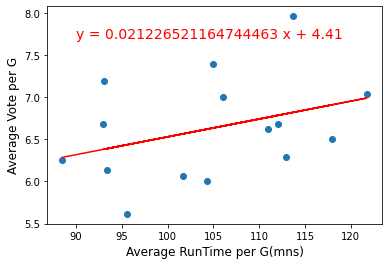

In [60]:
#linear regression line between the Average RunTime and average vote of each genere from 2000 t0 2020
x_values =prvf_df["Avg RunTime"]
y_values =prvf_df["Avg Vote"]
xlbl = "Average RunTime per G(mns)"
ylbl = "Average Vote per G"
eqpos = (90,7.7)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

The r-squared is: 0.076


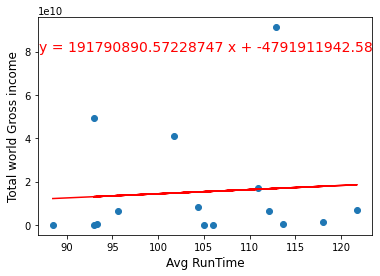

In [61]:
#linear regression line between the total gross income and average runtime of each genere from 2000 t0 2020
x_values = prvf_df["Avg RunTime"]
y_values = prvf_df["Total wgpg"]
xlbl = "Avg RunTime"
ylbl ="Total world Gross income" 
eqpos = (87,80000000000)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)


The r-squared is: -0.267


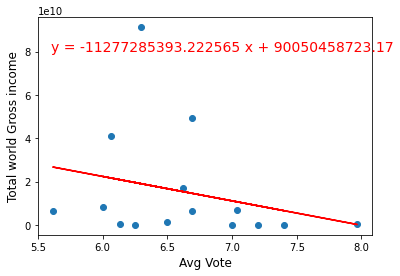

In [62]:
#linear regression line between the total gross income and average vote of each genere from 2000 t0 2020
x_values =prvf_df["Avg Vote"] 
y_values =prvf_df["Total wgpg"] 
xlbl = "Avg Vote"
ylbl ="Total world Gross income" 
eqpos = (5.6,80000000000)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)


The r-squared is: 0.903


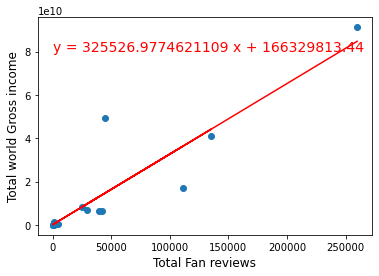

In [63]:
#linear regression line between the total gross income and fan reviews of each genere from 2000 t0 2020
x_values = prvf_df["Total Fan reviews"]
y_values =prvf_df["Total wgpg"] 
xlbl = "Total Fan reviews"
ylbl ="Total world Gross income" 
eqpos = (0,80000000000)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)